<a href="https://colab.research.google.com/github/ashlyjames/Project-Visual-Crypto/blob/main/New0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2
import keras
import os,glob
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import Sequential
from sklearn import preprocessing
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import adam_v2
from keras.applications.vgg19 import VGG19
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, ZeroPadding2D, BatchNormalization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

In [38]:
X = []
y = []
os.chdir('/content/gdrive/MyDrive/Mainproject/data/cl1')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append(0)
os.chdir('/content/gdrive/MyDrive/Mainproject/data/cl2')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append(1)
os.chdir('/content/gdrive/MyDrive/Mainproject/data/cl3')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append(2)
os.chdir('/content/gdrive/MyDrive/Mainproject/data/cl4')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append(3)
os.chdir('/content/gdrive/MyDrive/Mainproject/data/cl5')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append(4)
os.chdir('/content/gdrive/MyDrive/Mainproject/data/cl6')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append(5)
os.chdir('/content/gdrive/MyDrive/Mainproject/data/cl7')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append(6)
os.chdir('/content/gdrive/MyDrive/Mainproject/data/cl8')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append(7)
os.chdir('/content/gdrive/MyDrive/Mainproject/data/cl9')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append(8)
os.chdir('/content/gdrive/MyDrive/Mainproject/data/cl10')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append(9)

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/166 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/183 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_val[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [40]:
x_train = np.array(X_train)
x_val = np.array(X_val)
print("X_train Shape: ", x_train.shape)

X_train Shape:  (1041, 224, 224, 3)


In [41]:
y_train = np.array(y_train)
y_val = np.array(y_val)

In [ ]:
print("X_train Shape: ", x_val.shape)

X_train Shape:  (518, 224, 224, 3)


In [ ]:
np.unique(y_val)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
base_model = VGG19(weights='imagenet', include_top=False)

In [ ]:
from keras.applications import resnet
res_model = resnet.ResNet50

base_model = res_model(input_shape=(224, 224,3), include_top=False, weights="imagenet")

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
X_train = base_model.predict(x_train)
X_train.shape

(1051, 7, 7, 512)

In [ ]:
X_val = base_model.predict(x_val)
X_val.shape

(518, 7, 7, 512)

In [ ]:
# reshaping the training as well as validation frames in single dimension
X_train = X_train.reshape(1051, 7*7*512)
X_val = X_val.reshape(518, 7*7*512)

# normalizing the pixel values
max = X_train.max()
X_train = X_train/max
X_val = X_val/max

# shape of images
X_train.shape

(1051, 25088)

In [ ]:
model = Sequential()
model.add(Dense(1024, activation='relu',input_shape=(25088,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

print('CNN Architecture Created')

print(model.summary())

CNN Architecture Created
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 1024)              25691136  
                                                                 
 dropout_25 (Dropout)        (None, 1024)              0         
                                                                 
 dense_33 (Dense)            (None, 512)               524800    
                                                                 
 dropout_26 (Dropout)        (None, 512)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               131328    
                                                                 
 dropout_27 (Dropout)        (None, 256)               0         
                                                                 
 dense_35 (Dense)            

In [ ]:
y_val=np.array(y_val)

In [ ]:
from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('/content/gdrive/MyDrive/Mainproject/weights_new79.hdf5', save_best_only=True, monitor='val_loss', mode='min')
 
# compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
 
# training the model
history = model.fit(X_train, np.array(y_train), epochs=15, validation_split=0.1, callbacks=[mcp_save], batch_size=32)

Epoch 1/15
30/30 [==============================] - 12s 379ms/step - loss: 2.3110 - accuracy: 0.1238 - val_loss: 2.2008 - val_accuracy: 0.2925
Epoch 2/15
30/30 [==============================] - 7s 228ms/step - loss: 2.1558 - accuracy: 0.2074 - val_loss: 1.8757 - val_accuracy: 0.3019
Epoch 3/15
30/30 [==============================] - 7s 233ms/step - loss: 1.9016 - accuracy: 0.2603 - val_loss: 1.6716 - val_accuracy: 0.3302
Epoch 4/15
30/30 [==============================] - 15s 490ms/step - loss: 1.6216 - accuracy: 0.3566 - val_loss: 1.4450 - val_accuracy: 0.4906
Epoch 5/15
30/30 [==============================] - 7s 232ms/step - loss: 1.3952 - accuracy: 0.4212 - val_loss: 1.2458 - val_accuracy: 0.5849
Epoch 6/15
30/30 [==============================] - 9s 291ms/step - loss: 1.0528 - accuracy: 0.5778 - val_loss: 1.2037 - val_accuracy: 0.5755
Epoch 7/15
30/30 [==============================] - 7s 233ms/step - loss: 0.8380 - accuracy: 0.6730 - val_loss: 1.1643 - val_accuracy: 0.6132
Epoc

In [ ]:
print('x_train : {}'.format(x_train[1:20]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

In [ ]:
im_rows=224
im_cols=224
batch_size=512
im_shape=(im_rows, im_cols, 3)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_val = x_val.reshape(x_val.shape[0], *im_shape)


#print('x_train shape: {}'.format(y_train.shape[0]))
#print('x_test shape: {}'.format(y_test.shape))

In [ ]:
cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense( 1024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    #Dense(512, activation='relu'),
    #Dropout(0.5),
    #20 is the number of outputs
    Dense(10, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
from keras.models import Model
from keras.layers import Flatten, Dense
import keras.losses
from keras.applications.inception_resnet_v2 import InceptionResNetV2 as IncRes

base_model = VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in base_model.layers:
  layer.trainable=False

X=Flatten()(base_model.output)
X=Dense(units=512,activation='relu')(X)
X=Dropout(units=0.5)(X)
X=Dense(units=10, activation='softmax')(X)

model_IncRes = Model(base_model.input, X)

model_IncRes.compile(loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
y_val=np.array(y_val)

In [ ]:
history=model_IncRes.fit(
    x_train, np.array(y_train), batch_size=128,verbose=1,
    validation_data=(x_val,y_val), epochs= 20),

In [ ]:
cnn_model.summary()


In [ ]:
history=cnn_model.fit(
    x_train, np.array(y_train), batch_size=128,
    epochs=10, verbose=1,
    validation_split=0.1,
)


In [ ]:
from keras import optimizers
from keras.optimizers import adam_v2
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3),padding='same', activation='relu', input_shape=(224, 224,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(
    x_train, np.array(y_train), batch_size=128,
    epochs=10, verbose=1,
    validation_split=0.1,
)

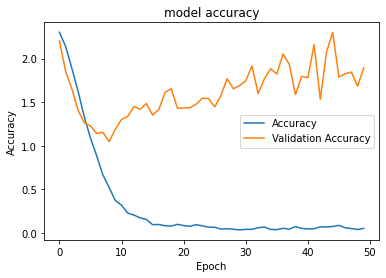

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

In [ ]:
model.save_weights('VGG16_val_accuracy_97.h5')

In [ ]:
model.save('VGG16_Model.h5')

In [ ]:
X1 = []
y1 = []
os.chdir('/content/gdrive/MyDrive/Mainproject/data_val/cll1')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X1.append(img)
      y1.append(0)
os.chdir('/content/gdrive/MyDrive/Mainproject/data_val/cll2')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X1.append(img)
      y1.append(1)
os.chdir('/content/gdrive/MyDrive/Mainproject/data_val/cll3')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X1.append(img)
      y1.append(2)
os.chdir('/content/gdrive/MyDrive/Mainproject/data_val/cll4')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X1.append(img)
      y1.append(3)
os.chdir('/content/gdrive/MyDrive/Mainproject/data_val/cll5')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X1.append(img)
      y1.append(4)
os.chdir('/content/gdrive/MyDrive/Mainproject/data_val/cll6')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X1.append(img)
      y1.append(5)
os.chdir('/content/gdrive/MyDrive/Mainproject/data_val/cll7')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X1.append(img)
      y1.append(6)
os.chdir('/content/gdrive/MyDrive/Mainproject/data_val/cll8')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X1.append(img)
      y1.append(7)
os.chdir('/content/gdrive/MyDrive/Mainproject/data_val/cll9')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X1.append(img)
      y1.append(8)
os.chdir('/content/gdrive/MyDrive/Mainproject/data_val/cll10')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X1.append(img)
      y1.append(9)

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
x_1 = np.array(X1,dtype='float32')/255

In [ ]:
x_train = x_train.reshape(x_train.shape[0], *im_shape)

In [ ]:
X_test = base_model.predict(x_1)
X_test.shape

(152, 7, 7, 512)

In [ ]:
X_test = X_test.reshape(152, 7*7*512)

# normalizing the pixel values
max = X_test.max()
X_test = X_test/max


In [ ]:
target_proba = model.predict(X_val, batch_size=1).astype(int)
classes_x=np.argmax(target_proba,axis=1)


In [ ]:
classes_x[0:]

In [ ]:
y_1 = np.array(y1)
y_test=np.argmax(y_1)


In [ ]:
x_test=np.array(X1)
y_tesr=np.array(y1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(classes_x, y_val)*100

7.915057915057915

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(classes_x,y_val))

              precision    recall  f1-score   support

           0       1.00      0.07      0.14       515
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.05      1.00      0.09         2
           5       0.02      1.00      0.04         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.08       518
   macro avg       0.11      0.21      0.03       518
weighted avg       0.99      0.08      0.14       518



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(classes_x,y_test))
 
print(metrics.classification_report(classes_x,y_test,digits=3))

[[44  8  9 26  6  7 20 10  3 13]
 [ 0 16  2  0  0  0  0  0  0  0]
 [ 0  3 33  0  0  0  1  0  0  1]
 [ 0  0  0 11  0  1  0  2  0  0]
 [ 0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  2  0  0 25]]
              precision    recall  f1-score   support

           0      1.000     0.301     0.463       146
           1      0.593     0.889     0.711        18
           2      0.750     0.868     0.805        38
           3      0.297     0.786     0.431        14
           4      0.786     1.000     0.880        22
           5      0.714     1.000     0.833        20
           6      0.439     1.000     0.610        18
           7      0.571     1.000     0.727        16
           8      0.812     1.000     0.897        13
           9      0.641     0.926     0.758        27

    accuracy                          0.657       332
   macro avg      0

In [ ]:
from natsort import natsorted
from PIL import Image
image_list = []
for filename in natsorted (glob.glob("/content/gdrive/MyDrive/Mainproject/share1/shA*.jpg")):
  print(filename)
  img = Image.open(filename)
  image_list.append(img)
image_list1 = []
for filenm in natsorted (glob.glob("/content/gdrive/MyDrive/Mainproject/share2/shB*.jpg")):
  print(filenm)
  img1 = Image.open(filenm)
  image_list1.append(img1)

/content/gdrive/MyDrive/Mainproject/share1/shA1.jpg
/content/gdrive/MyDrive/Mainproject/share1/shA2.jpg
/content/gdrive/MyDrive/Mainproject/share1/shA3.jpg
/content/gdrive/MyDrive/Mainproject/share1/shA4.jpg
/content/gdrive/MyDrive/Mainproject/share1/shA5.jpg
/content/gdrive/MyDrive/Mainproject/share1/shA6.jpg
/content/gdrive/MyDrive/Mainproject/share1/shA7.jpg
/content/gdrive/MyDrive/Mainproject/share1/shA8.jpg
/content/gdrive/MyDrive/Mainproject/share1/shA9.jpg
/content/gdrive/MyDrive/Mainproject/share1/shA10.jpg
/content/gdrive/MyDrive/Mainproject/share2/shB1.jpg
/content/gdrive/MyDrive/Mainproject/share2/shB2.jpg
/content/gdrive/MyDrive/Mainproject/share2/shB3.jpg
/content/gdrive/MyDrive/Mainproject/share2/shB4.jpg
/content/gdrive/MyDrive/Mainproject/share2/shB5.jpg
/content/gdrive/MyDrive/Mainproject/share2/shB6.jpg
/content/gdrive/MyDrive/Mainproject/share2/shB7.jpg
/content/gdrive/MyDrive/Mainproject/share2/shB8.jpg
/content/gdrive/MyDrive/Mainproject/share2/shB9.jpg
/content/gd

In [ ]:
from PIL import Image, ImageChops
img3 = []
i = image_list[2]
j = image_list1[2]
  
img3 = ImageChops.add(i,j)

img3.save("final.jpg")  

In [ ]:
from google.colab.patches import cv2_imshow
image = cv2.imread('final.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/gdrive/MyDrive/Mainproject/final.pgm',gray_image)
#cv2_imshow( gray_image)
#cv2.waitKey(0) 

True

In [ ]:
from keras.preprocessing import image
img = image.load_img('final.jpg', target_size=(100,100,3))

In [ ]:
prediction_image = np.array(img)
prediction_images = np.array(prediction_image,dtype='float32')/255
prediction_images.reshape(1 ,100, 100,3)
prediction_images= np.expand_dims(prediction_image, axis=0)
print("X_train Shape: ", prediction_images.shape)
    # extracting features using pre-trained model
#prediction_images = base_model.predict(prediction_images)
    # converting features in one dimensional array

    # predicting tags for each array
prediction = cnn_model.predict(prediction_images)
class_x   = np.argmax(prediction)
class_x

X_train Shape:  (1, 100, 100, 3)


7

In [ ]:

from keras.preprocessing import image
img = image.load_img('final.jpg', target_size=(100,100,3))
prediction_image = np.array(img)
prediction_image.reshape( 1,100, 100,3)
prediction_images= np.expand_dims(prediction_image, axis=0)
prediction = cnn_model.predict(prediction_images)
print('',prediction)
class_x   = np.argmax(prediction)
class_x

 [[3.9456854e-20 1.5360633e-17 2.0712614e-06 1.7493629e-15 7.1804884e-10
  3.4837486e-24 2.4366737e-16 9.9999797e-01 3.8630714e-20 6.2525334e-15]]


7

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU
from keras.layers.noise import AlphaDropout
from keras.optimizers import adam_v2
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16

In [ ]:
orlfaces = np.load("/content/gdrive/MyDrive/Mainproject/ORL_faces.npz")
orlfaces.files

['testY', 'testX', 'trainX', 'trainY']

In [ ]:
print(orlfaces['trainX'].shape)
print(orlfaces['trainY'].shape)
print(orlfaces['testX'].shape)
print(orlfaces['testY'].shape)

(240, 10304)
(240,)
(160, 10304)
(160,)


In [ ]:
X = np.reshape(orlfaces['trainX'], (240, 112, 92,1))
Y = orlfaces['trainY']
X_test = np.reshape(orlfaces['testX'], (160, 112, 92,1))
Y_test = orlfaces['testY']

In [ ]:
np.unique(Y)
np.unique(Y_test)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=uint8)

In [ ]:
model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= (224, 224, 3)),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= (224, 224, 3)),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')]) #Output layer
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 36)      5328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 36)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 105, 105, 54)      48654     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 52, 52, 54)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 146016)            0         
                                                                 
 dense (Dense)               (None, 2024)              2

In [ ]:
#X_train = x_train.astype(np.float32) / 255.0
#X_test = x_val.astype(np.float32) / 255.0


model.compile(
        loss='sparse_categorical_crossentropy', 
        optimizer='adam', 
        #optimizer=Adam(), 
        metrics=['accuracy']
    )
history = model.fit(
    x = x_train, y=np.array(y_train),
    validation_split=0.1,
    epochs=10,
    batch_size=512,
     verbose=2)

Epoch 1/10


In [ ]:
target_proba = model.predict(X_test, batch_size=1).astype(int)
classes_x=np.argmax(target_proba,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(classes_x, Y_test)*100

86.25

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(classes_x,Y_test))
 
print(metrics.classification_report(classes_x,Y_test,digits=3))

[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 4 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 2 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           0      1.000     0.571     0.727        14
           1      1.000     1.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/Mainproject/data',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1569 files belonging to 10 classes.
Using 1256 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/Mainproject/data',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1569 files belonging to 10 classes.
Using 313 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['cl1', 'cl10', 'cl2', 'cl3', 'cl4', 'cl5', 'cl6', 'cl7', 'cl8', 'cl9']


In [42]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=10,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False



In [43]:
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(10, activation='softmax'))

In [ ]:
resnet_model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=20)

In [44]:
from keras.callbacks import ModelCheckpoint

resnet_model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

mcp_save = ModelCheckpoint('/content/gdrive/MyDrive/Mainproject/weights_new80.hdf5', save_best_only=True, monitor='val_loss', mode='min')

history = resnet_model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=10, callbacks=[mcp_save])

Epoch 1/10
33/33 [==============================] - 249s 7s/step - loss: 2.0012 - accuracy: 0.3218 - val_loss: 1.2274 - val_accuracy: 0.5400
Epoch 2/10
33/33 [==============================] - 241s 7s/step - loss: 1.0745 - accuracy: 0.6167 - val_loss: 1.1077 - val_accuracy: 0.6082
Epoch 3/10
33/33 [==============================] - 238s 7s/step - loss: 0.8326 - accuracy: 0.6993 - val_loss: 0.8507 - val_accuracy: 0.6901
Epoch 4/10
33/33 [==============================] - 238s 7s/step - loss: 0.6212 - accuracy: 0.7877 - val_loss: 0.9565 - val_accuracy: 0.6491
Epoch 5/10
33/33 [==============================] - 242s 7s/step - loss: 0.5515 - accuracy: 0.7983 - val_loss: 0.7984 - val_accuracy: 0.7290
Epoch 6/10
33/33 [==============================] - 238s 7s/step - loss: 0.4857 - accuracy: 0.8319 - val_loss: 0.8060 - val_accuracy: 0.7212
Epoch 7/10
33/33 [==============================] - 240s 7s/step - loss: 0.3986 - accuracy: 0.8674 - val_loss: 0.7485 - val_accuracy: 0.7563
Epoch 8/10
33

In [ ]:
resnet_model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=10)

Epoch 1/10
33/33 [==============================] - 264s 8s/step - loss: 1.9325 - accuracy: 0.3549 - val_loss: 1.2963 - val_accuracy: 0.5444
Epoch 2/10
33/33 [==============================] - 254s 8s/step - loss: 1.1349 - accuracy: 0.6013 - val_loss: 1.0041 - val_accuracy: 0.6351
Epoch 3/10
33/33 [==============================] - 254s 8s/step - loss: 0.8313 - accuracy: 0.6984 - val_loss: 0.9751 - val_accuracy: 0.6525
Epoch 4/10
33/33 [==============================] - 254s 8s/step - loss: 0.7308 - accuracy: 0.7545 - val_loss: 0.9173 - val_accuracy: 0.6757
Epoch 5/10
33/33 [==============================] - 256s 8s/step - loss: 0.5942 - accuracy: 0.8135 - val_loss: 0.8881 - val_accuracy: 0.6660
Epoch 6/10
33/33 [==============================] - 255s 8s/step - loss: 0.4830 - accuracy: 0.8382 - val_loss: 0.8020 - val_accuracy: 0.6988
Epoch 7/10
33/33 [==============================] - 255s 8s/step - loss: 0.4141 - accuracy: 0.8706 - val_loss: 0.7857 - val_accuracy: 0.7027
Epoch 8/10
33

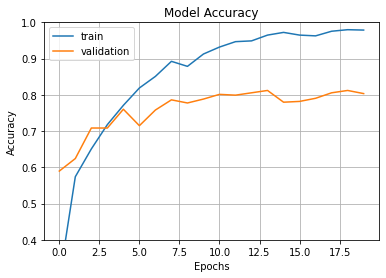

In [26]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/Mainproject/data_val',
  seed=None,
  labels='inferred',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 152 files belonging to 10 classes.


In [ ]:
class_names = test_ds.class_names
print(class_names)

['cll1', 'cll10', 'cll2', 'cll3', 'cll4', 'cll5', 'cll6', 'cll7', 'cll8', 'cll9']


In [45]:
pred=resnet_model.predict(x_test)
pred

In [46]:
classes_x=np.argmax(pred,axis=1)

In [ ]:
target_proba = resnet_model.predict(test_ds)
classes_x=np.argmax(target_proba,axis=1)


In [47]:
classes_x

array([0, 0, 3, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 9, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 2, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7,
       7, 7, 7, 3, 7, 3, 7, 7, 7, 7, 7, 7, 4, 8, 8, 8, 8, 8, 8, 8, 8, 4,
       8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(classes_x, y_tesr)*100

86.18421052631578

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(classes_x, y_tesr)*100

90.13157894736842

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(classes_x,y_tesr))
 
print(metrics.classification_report(classes_x,y_tesr,digits=3))

[[13  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  2 12  0  0  0  3  0  1  1]
 [ 1  0  1 15  0  0  0  1  0  0]
 [ 0  1  0  0 15  0  0  0  2  0]
 [ 0  0  0  0  0 15  0  0  0  0]
 [ 0  0  3  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  1 14  0  0]
 [ 0  0  0  0  1  0  0  0 12  0]
 [ 1  1  0  0  0  0  1  0  0 14]]
              precision    recall  f1-score   support

           0      0.867     1.000     0.929        13
           1      0.733     1.000     0.846        11
           2      0.750     0.632     0.686        19
           3      1.000     0.833     0.909        18
           4      0.938     0.833     0.882        18
           5      1.000     1.000     1.000        15
           6      0.667     0.769     0.714        13
           7      0.933     0.933     0.933        15
           8      0.800     0.923     0.857        13
           9      0.933     0.824     0.875        17

    accuracy                          0.862       152
   macro avg      0

In [49]:
from sklearn import metrics
print(metrics.confusion_matrix(classes_x,y_tesr))
 
print(metrics.classification_report(classes_x,y_tesr,digits=3))

[[12  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  1  0  0  0  0  0]
 [ 1  1 14  0  0  0  1  0  0  0]
 [ 2  0  0 14  0  0  0  2  0  0]
 [ 0  0  0  0 15  0  1  0  2  0]
 [ 0  0  0  0  0 15  0  0  0  0]
 [ 0  0  1  0  0  0 13  0  0  0]
 [ 0  0  0  1  0  0  0 13  0  0]
 [ 0  0  0  0  0  0  0  0 13  0]
 [ 0  1  1  0  0  0  0  0  0 15]]
              precision    recall  f1-score   support

           0      0.800     1.000     0.889        12
           1      0.867     0.929     0.897        14
           2      0.875     0.824     0.848        17
           3      0.933     0.778     0.848        18
           4      0.938     0.833     0.882        18
           5      1.000     1.000     1.000        15
           6      0.867     0.929     0.897        14
           7      0.867     0.929     0.897        14
           8      0.867     1.000     0.929        13
           9      1.000     0.882     0.938        17

    accuracy                          0.901       152
   macro avg      0

In [ ]:
from natsort import natsorted
from PIL import Image
image_list = []
for filename in natsorted(glob.glob("/content/gdrive/MyDrive/Mainproject/data_val/cll3/*.jpg")):
  print(filename)
  img = Image.open(filename)
  image_list.append(img)

In [ ]:
import cv2
image=image_list[0]
image = np.array(image)
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
pred=resnet_model.predict(image)
classes_x=np.argmax(pred)
classes_x

3

In [ ]:
classes_x=np.argmax(pred)
classes_x

2